In [37]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/My Drive/Colab Notebooks/professor/57-oracle-allinone/results_basket/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import pandas as pd

data = pd.read_csv (r'results_tor.csv')
print (data.columns)

Index(['dataset_name', 'oracle_param_oracle_name',
       'oracle_param_number_of_epochs_for_training_feature_extractor',
       'oracle_param_number_of_hidden_layers_for_classifier',
       'oracle_param_number_of_neurons_in_layer_for_classifier',
       'oracle_param_number_of_epochs_for_training_classifier',
       'wtst_param_number_of_accepted_failed_attempts',
       'wtst_param_epoch_unit',
       'gan_param_number_of_generated_samples_perclass', 'maj_class_count',
       'min_maj_rate', 'maj_f1', 'min_f1', 'stopping_epoch', 'fold'],
      dtype='object')


In [39]:
df = data[data['dataset_name']=='tor']
df= df.reset_index()

In [40]:
temp = df.groupby('oracle_param_oracle_name')

In [41]:
c = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['cas']].groupby('maj_class_count').mean()
f = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['fixed']].groupby('maj_class_count').mean()
n = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['fcn']].groupby('maj_class_count').mean()
i = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['mis']].groupby('maj_class_count').mean()
d = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['mfid']].groupby('maj_class_count').mean()
nn = df[['oracle_param_oracle_name','maj_class_count','min_f1','maj_f1']].iloc[temp.groups['no_oversampling']].groupby('maj_class_count').mean()



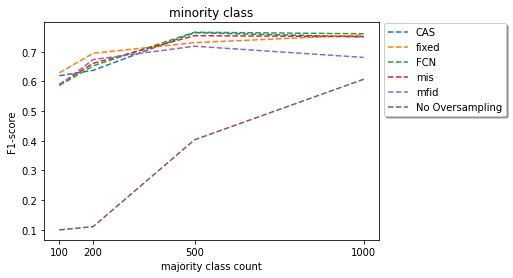

In [42]:
from matplotlib import pyplot as plt

fig = plt.figure()

plt.plot(c['min_f1'], linestyle='dashed', label='CAS')
plt.plot(f['min_f1'], linestyle='dashed', label='fixed')
plt.plot(n['min_f1'], linestyle='dashed', label='FCN')
plt.plot(i['min_f1'], linestyle='dashed', label='mis')
plt.plot(d['min_f1'], linestyle='dashed', label='mfid')
plt.plot(nn['min_f1'], linestyle='dashed', label='No Oversampling')


plt.xticks([100, 200, 500, 1000])
plt.legend(shadow=True, bbox_to_anchor =(1, 1.02))

plt.xlabel('majority class count')
plt.ylabel('F1-score')
plt.title('minority class')
plt.show()

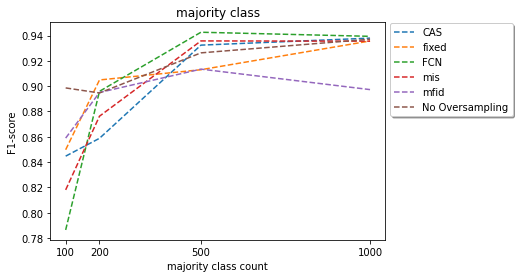

In [43]:
from matplotlib import pyplot as plt

fig = plt.figure()

plt.plot(c['maj_f1'], linestyle='dashed', label='CAS')
plt.plot(f['maj_f1'], linestyle='dashed', label='fixed')
plt.plot(n['maj_f1'], linestyle='dashed', label='FCN')
plt.plot(i['maj_f1'], linestyle='dashed', label='mis')
plt.plot(d['maj_f1'], linestyle='dashed', label='mfid')
plt.plot(nn['maj_f1'], linestyle='dashed', label='No Oversampling')


plt.xticks([100, 200, 500, 1000])
plt.legend(shadow=True, bbox_to_anchor =(1, 1.02))

plt.xlabel('majority class count')
plt.ylabel('F1-score')
plt.title('majority class')
plt.show()

In [44]:
c = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['cas']].groupby('min_maj_rate').mean()
f = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['fixed']].groupby('min_maj_rate').mean()
n = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['fcn']].groupby('min_maj_rate').mean()
i = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['mis']].groupby('min_maj_rate').mean()
d = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['mfid']].groupby('min_maj_rate').mean()
nn = df[['oracle_param_oracle_name','min_maj_rate','min_f1','maj_f1']].iloc[temp.groups['no_oversampling']].groupby('min_maj_rate').mean()

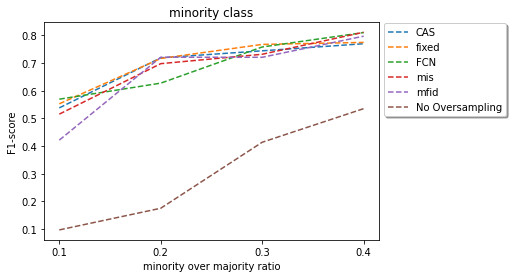

In [45]:
from matplotlib import pyplot as plt

fig = plt.figure()

plt.plot(c['min_f1'], linestyle='dashed', label='CAS')
plt.plot(f['min_f1'], linestyle='dashed', label='fixed')
plt.plot(n['min_f1'], linestyle='dashed', label='FCN')
plt.plot(i['min_f1'], linestyle='dashed', label='mis')
plt.plot(d['min_f1'], linestyle='dashed', label='mfid')
plt.plot(nn['min_f1'], linestyle='dashed', label='No Oversampling')


plt.xticks([0.1, 0.2, 0.3, 0.4])
plt.legend(shadow=True, bbox_to_anchor =(1, 1.02))

plt.xlabel('minority over majority ratio')
plt.ylabel('F1-score')
plt.title('minority class')
plt.show()

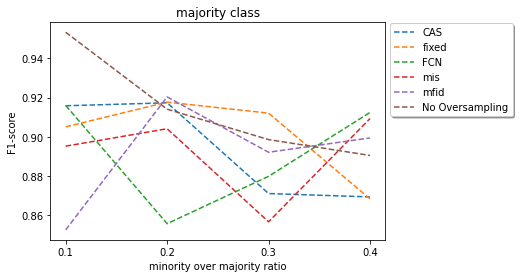

In [46]:
from matplotlib import pyplot as plt

fig = plt.figure()

plt.plot(c['maj_f1'], linestyle='dashed', label='CAS')
plt.plot(f['maj_f1'], linestyle='dashed', label='fixed')
plt.plot(n['maj_f1'], linestyle='dashed', label='FCN')
plt.plot(i['maj_f1'], linestyle='dashed', label='mis')
plt.plot(d['maj_f1'], linestyle='dashed', label='mfid')
plt.plot(nn['maj_f1'], linestyle='dashed', label='No Oversampling')


plt.xticks([0.1, 0.2, 0.3, 0.4])
plt.legend(shadow=True, bbox_to_anchor =(1, 1.02))

plt.xlabel('minority over majority ratio')
plt.ylabel('F1-score')
plt.title('majority class')
plt.show()

In [47]:
def table_by2(col1,col2):
  r = df[[col1, col2,
          'maj_f1','min_f1','stopping_epoch']]
  mean = r.groupby([col1, col2])
  return mean

In [48]:
m = table_by2('oracle_param_oracle_name','maj_class_count')
m.mean()

maj_f1    min_f1  stopping_epoch
oracle_param_oracle_name maj_class_count                                    
cas                      100              0.844685  0.619250           920.0
                         200              0.858785  0.637325           870.0
                         500              0.932426  0.764345          1000.0
                         1000             0.937965  0.749928          1170.0
fcn                      100              0.786384  0.586208          1925.0
                         200              0.895922  0.652472          2435.0
                         500              0.942613  0.765770          2760.0
                         1000             0.939382  0.760612          2745.0
fixed                    100              0.849760  0.628808          1500.0
                         200              0.904900  0.694988          1500.0
                         500              0.913002  0.730666          1500.0
                         1000             0.935726  0.756692          1500.0
mfid                     100              0.858951  0.587197           855.0
                         200              0.894989  0.673766          1060.0
                         500              0.913467  0.718621           975.0
                         1000             0.897280  0.680918          1060.0
mis                      100              0.818032  0.590040          1440.0
                         200              0.876262  0.660930          1510.0
                         500              0.935755  0.754144          1845.0
                         1000             0.935548  0.751120          1365.0
no_oversampling          100              0.898605  0.099573            -1.0
                         200              0.894611  0.110610            -1.0
                         500              0.926315  0.403350            -1.0
                         1000             0.937101  0.607261            -1.0

In [49]:
m = table_by2('oracle_param_oracle_name','min_maj_rate')
m.mean()

maj_f1    min_f1  stopping_epoch
oracle_param_oracle_name min_maj_rate                                    
cas                      0.1           0.915862  0.537906           840.0
                         0.2           0.917373  0.718873           925.0
                         0.3           0.871173  0.744212          1015.0
                         0.4           0.869453  0.769856          1180.0
fcn                      0.1           0.916056  0.569393          2535.0
                         0.2           0.855832  0.627376          2595.0
                         0.3           0.879941  0.758097          2245.0
                         0.4           0.912472  0.810197          2490.0
fixed                    0.1           0.905134  0.552608          1500.0
                         0.2           0.917714  0.716603          1500.0
                         0.3           0.912112  0.767344          1500.0
                         0.4           0.868429  0.774600          1500.0
mfid                     0.1           0.852654  0.421372           995.0
                         0.2           0.920362  0.721139           990.0
                         0.3           0.892190  0.720830          1070.0
                         0.4           0.899480  0.797161           895.0
mis                      0.1           0.895295  0.515315          2165.0
                         0.2           0.904163  0.697809          1550.0
                         0.3           0.856793  0.731752          1090.0
                         0.4           0.909346  0.811357          1355.0
no_oversampling          0.1           0.953298  0.096788            -1.0
                         0.2           0.914131  0.175128            -1.0
                         0.3           0.898637  0.413723            -1.0
                         0.4           0.890567  0.535155            -1.0

#Confidence Interval

In [50]:
import numpy as np
import statsmodels.stats.api as sms

In [51]:
def with_interval(oracle, by_col, which_class):
  c = df[['oracle_param_oracle_name','maj_class_count','min_maj_rate','min_f1','maj_f1', 'fold', 'stopping_epoch']]\
  .iloc[temp.groups[oracle]].groupby([by_col, 'fold'], as_index=False)

  data = c.mean()
  bounds = []
  epochs = []
  for i in data[by_col].unique():
    data_np = np.array(data[data[by_col]==i][which_class])
    bounds.append(sms.DescrStatsW(data_np).tconfint_mean())

    data_np = np.array(data[data[by_col]==i]['stopping_epoch'])
    epochs.append(data_np.std())


  bounds_np = np.array(bounds)
  lowers = bounds_np[:,0]
  uppers = bounds_np[:,1]


  

  data_folded = data.groupby(by_col).mean()[['min_f1', 'maj_f1']]
  x = np.array(data_folded.index)

  y = np.array(data_folded[which_class])

  return x, lowers, y, uppers, np.array(epochs)



In [52]:
np.array([1,1,1,1,1,1,20]).std()

6.648615016125769

In [53]:
with_interval('cas', 'min_maj_rate', 'maj_f1')

(array([0.1, 0.2, 0.3, 0.4]),
 array([0.85897937, 0.87249966, 0.77159438, 0.77729532]),
 array([0.91586233, 0.91737265, 0.87117327, 0.86945286]),
 array([0.97274529, 0.96224564, 0.97075216, 0.9616104 ]),
 array([404.22765863, 156.52475842, 336.37776383, 291.71904292]))

In [54]:
def draw_with_confidence(oracle, by_col, which_class):
  x, lowers, y, uppers, epc_std = with_interval(oracle, by_col, which_class)

  fig, ax = plt.subplots()

  ax.plot(x,epc_std, linestyle='dashed', color='g')
  ax.plot(x,y, linestyle='dashed', color='r')
  ax.fill_between(x, (lowers), (uppers), color='blue', alpha=.1)
  ax.legend([oracle, 'confidence interval'],  loc =4)

  plt.xticks(list(x))

  # plt.legend(shadow=True, bbox_to_anchor =(1, 1.02))

  plt.xlabel(by_col)
  plt.ylabel('F1-score')
  plt.title(which_class)
  plt.ylim([0, 1])


  plt.show()

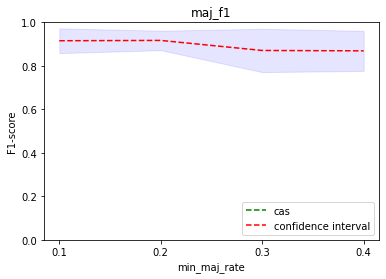

In [55]:
draw_with_confidence('cas', 'min_maj_rate', 'maj_f1')

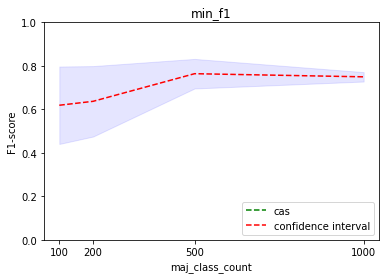

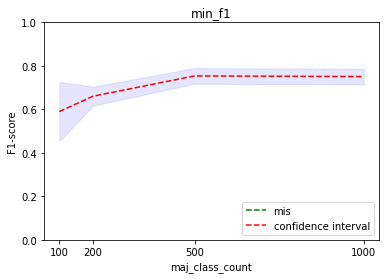

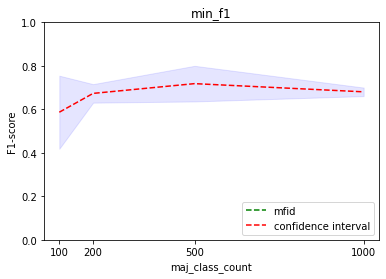

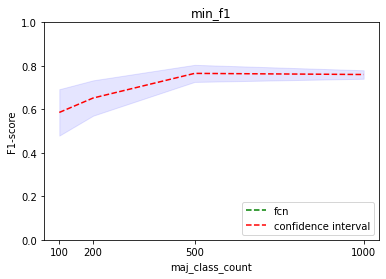

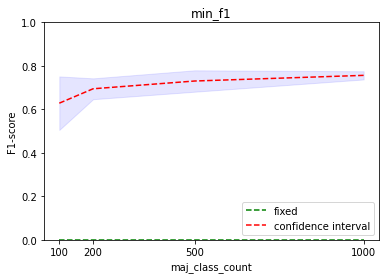

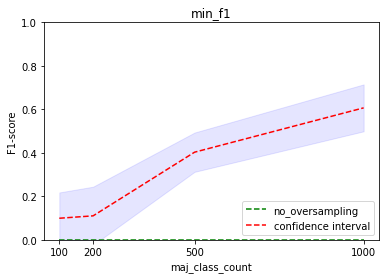

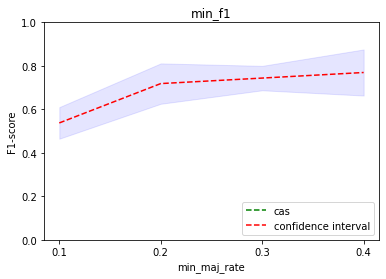

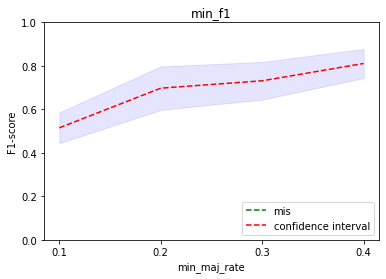

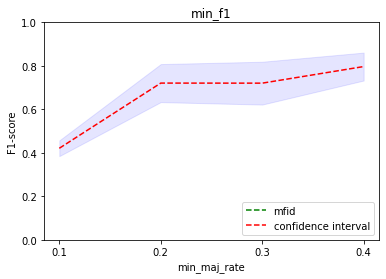

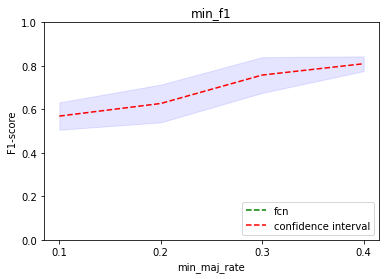

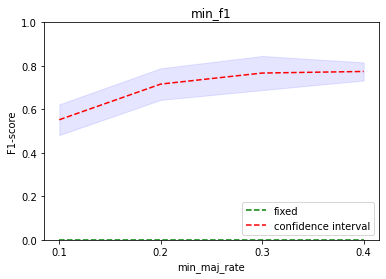

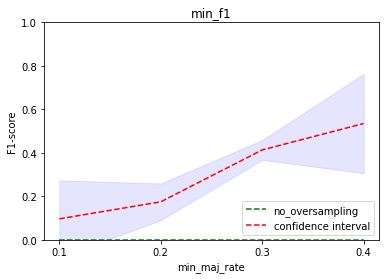

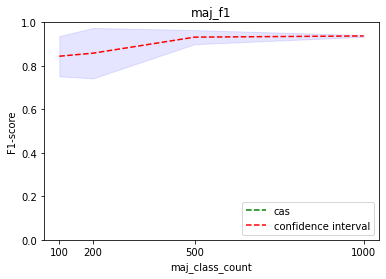

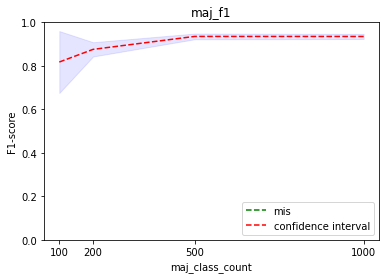

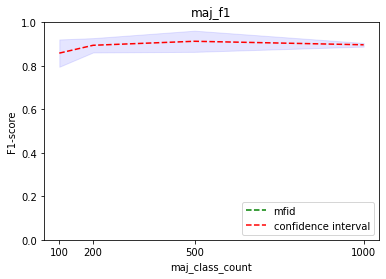

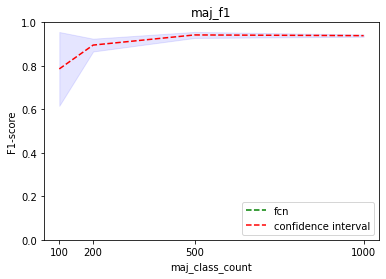

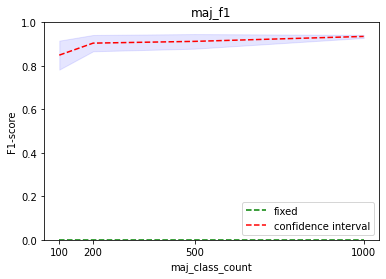

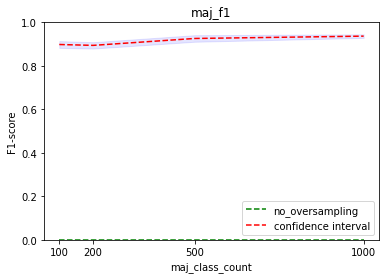

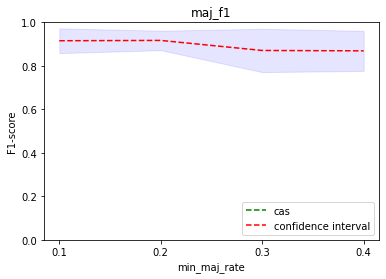

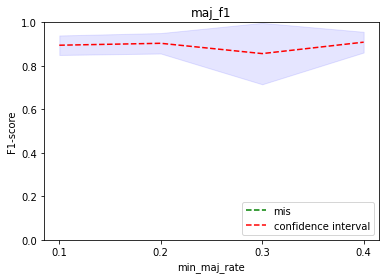

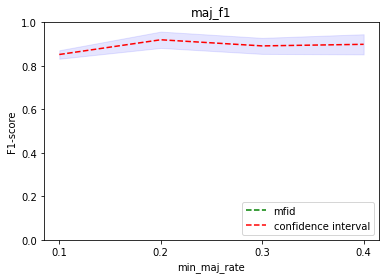

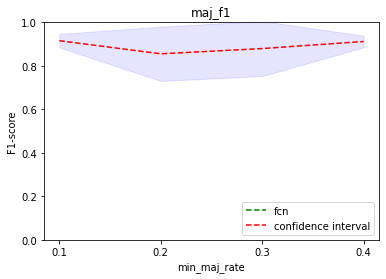

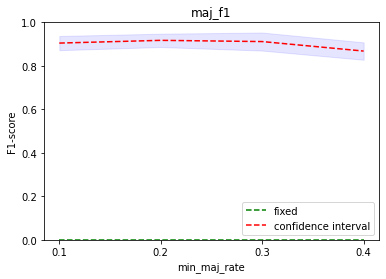

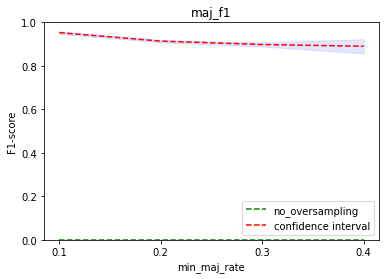

In [56]:
for class_ in ['min_f1', 'maj_f1']:
  for col in ['maj_class_count', 'min_maj_rate']:
    for o in ['cas', 'mis', 'mfid', 'fcn', 'fixed', 'no_oversampling']:
      draw_with_confidence(o, col, class_)